# Module #3 - Data Science with Python

Remember that `pandas` `DataFrames` are always two-dimensional, rectangular arrays of data. So how is that different from a `numpy` array? Simply put, a `pandas` `DataFrame` is a "reskinned" or "repurposed" `numpy` array in that they are actually built on and around `numpy` arrays. However, there are a few points that make `DataFrames` more specialized for data science:

- A `DataFrame` can contain different data types (numerics, strings, booleans) in different columns (though each column has to be homogenous), whereas a `numpy` array is entirely homogenous
- A `DataFrame` can have named rows and columns, which makes inspecting data much more convenient
- A `DataFrame` integrates well with several graphing/plotting packages, such as `matplotlib.pyplot`, `plotly`, `bokeh`, `seaborn`, and others to make data visualization easier
- A `DataFrame` is always 2-dimensional, whereas a `numpy` array can be N-dimensional

In conclusion, `numpy` arrays are extremely powerful objects for matrix math, whether that is basic linear algebra, image processing, or any other problem that can mathematically be expressed as an N-dimensional matrix. A `DataFrame` is a very specialized version of a matrix that is completely geared toward data science, summarizing and visualizing datasets, and extracting information from them. This means that each has a space of applications where it far outperforms the other.

In [27]:
#installing required packages
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy

## Creating a `DataFrame` and accessing columns

As hinted at during the previous module, `DataFrames` can be created manually from dictionaries (although in real life it's a lot more common to import them from csv files using `pd.read_csv()`).

In [28]:
import pandas as pd
my_df = pd.DataFrame(data={
    'col_one': range(1, 5),
    'col_two': range(11, 15),
    'col_three': range(21, 25)
}, index = [
    'row_one', 'row_two', 'row_three', 'row_four'
])
display(my_df)

,col_one,col_two,col_three
row_one,1,11,21
row_two,2,12,22
row_three,3,13,23
row_four,4,14,24


We can then access individual columns or lists of columns by their name. When we use single brackets `[]`, the column is extracted as a `pandas` `Series` object:

In [29]:
display(my_df['col_one'])
display(type(my_df['col_one']))

row_one      1
row_two      2
row_three    3
row_four     4
Name: col_one, dtype: int64

pandas.core.series.Series

When we use double brackets `[[]]`, the column of interest is extracted as a `DataFrame`:

In [30]:
display(my_df[['col_one']])
display(type(my_df[['col_one']]))

,col_one
row_one,1
row_two,2
row_three,3
row_four,4


pandas.core.frame.DataFrame

**Challenge problem:** Can you write a line of code that will access both `col_one` **and** `col_two`?

## Accessing the index and column names

If we want to access, or possibly overwrite, the index or column names of a `DataFrame`, we can do so by accessing a `DataFrame` object's `index` and `columns` attributes:

In [31]:
display(my_df.index)
display(my_df.columns)

Index(['row_one', 'row_two', 'row_three', 'row_four'], dtype='object')

Index(['col_one', 'col_two', 'col_three'], dtype='object')

## Accessing elements by index

We discussed before how to access columns. But how do we access individual cell values in a `DataFrame`? The `iloc[]` method accomplishes this by accessing the cell at a given row and column index. We can use single brackets `[]` to access the element directly and extract it as the type of object contained in the cell:

In [32]:
display(my_df.iloc[1,1])
display(type(my_df.iloc[1, 1]))

12

numpy.int64

Or we can use double brackets `[[],[]]` to extract the element as a `DataFrame` object:

In [33]:
display(my_df.iloc[[1],[1]])
display(type(my_df.iloc[[1],[1]]))

,col_two
row_two,12


pandas.core.frame.DataFrame

We can use either notation with the `iloc[]` method to set individual cells to a new value:

In [34]:
my_df.iloc[1,1] = 0
display(my_df)

my_df.iloc[[1], [1]] = 12
display(my_df)

,col_one,col_two,col_three
row_one,1,11,21
row_two,2,0,22
row_three,3,13,23
row_four,4,14,24


,col_one,col_two,col_three
row_one,1,11,21
row_two,2,12,22
row_three,3,13,23
row_four,4,14,24


## Accessing elements by name

The `iloc[]` method accesses `DataFrame` elements by index, as shown above. The `loc[]` method does the same thing with row and column names, passed as strings to the method. Again, single brackets `[]` extract the cell as the data type contained within it:

In [35]:
display(my_df.loc['row_two','col_two'])
display(type(my_df.loc['row_two', 'col_two']))

12

numpy.int64

And double brackets `[[],[]]` extract the element as a `DataFrame`:

In [36]:
display(my_df.loc[['row_two'],['col_two']])
display(type(my_df.loc[['row_two'],['col_two']]))

,col_two
row_two,12


pandas.core.frame.DataFrame

Just like the `iloc[]` method, `loc[]` can be used to assign new values to a cell:

In [37]:
my_df.loc['row_two','col_two'] = 0
display(my_df)

my_df.loc[['row_two'], ['col_two']] = 12
display(my_df)

,col_one,col_two,col_three
row_one,1,11,21
row_two,2,0,22
row_three,3,13,23
row_four,4,14,24


,col_one,col_two,col_three
row_one,1,11,21
row_two,2,12,22
row_three,3,13,23
row_four,4,14,24


**Challenge problem:** Can you write a line of code that accesses **all** of `col_two`? You can use either `loc[]` or `iloc[]`

## Filtering rows with logical gates

Just like a `numpy` array, `DataFrames` can be filtered using a boolean, or logical gate. Here, we'll filter `my_df` to display only the rows that correspond to a certain logical filter. This can be used to filter a dataset based on the value of one of the variables within it. Note that this filters rows, not columns.

In [38]:
# Filter rows by column value
display(my_df[my_df['col_one'] == 1])
display(my_df[my_df['col_one'] < 4])

,col_one,col_two,col_three
row_one,1,11,21


,col_one,col_two,col_three
row_one,1,11,21
row_two,2,12,22
row_three,3,13,23


## Discarding data

Our dataset may contain null values, represented in `numpy` as `np.nan`. We can use the `dropna()` method to drop all rows that contain null values (we can also pass a subset of column names to `dropna()` to only filter null values from certain variables). Handling null values is a whole topic on its own that will be treated in depth later in the workshop.

In [39]:
import numpy as np

In [40]:
my_df.iloc[0,0] = np.nan
display(my_df)
my_df.dropna(inplace = True)
display(my_df)

,col_one,col_two,col_three
row_one,NaN,11,21
row_two,2.0,12,22
row_three,3.0,13,23
row_four,4.0,14,24


,col_one,col_two,col_three
row_two,2.0,12,22
row_three,3.0,13,23
row_four,4.0,14,24


**Challenge question:** On line 3 above, what does the argument `inplace = True` do?

If we want to discard an entire column of data, we can do so using the `drop()` method:

In [41]:
my_df.drop(labels = 'col_one', axis = 1, inplace = True)
display(my_df)

,col_two,col_three
row_two,12,22
row_three,13,23
row_four,14,24


## Counting values and sorting `DataFrames`

The `count()` and `sort_values()` methods are very useful when we want to summarize or rank our data based on a certain metric. There are many other summary methods to calculate the mean, for example, or other statistical metrics. Refer to the `pandas` documentation for more information on existing methods and how to use them.

In [42]:
display(my_df.count())
display(my_df.sort_values(by = 'col_two', ascending = False))

col_two      3
col_three    3
dtype: int64

,col_two,col_three
row_four,14,24
row_three,13,23
row_two,12,22


## Merging two `DataFrames`

It is often necessary to merge overlapping data from two separate sources. This can be done with the `merge()` method as shown below. The `how` argument specifies the kind of merge we want, such as the union of the two datasets (`outer`) or the intersection (`inner`):

In [43]:
my_df2 = pd.DataFrame(data={
    'col_two': range(11, 15),
    'col_four': range(31, 35),
    'col_five': range(41, 45)
}, index = [
    'row_one', 'row_two', 'row_three', 'row_four'
])
display(my_df)
display(my_df2)

,col_two,col_three
row_two,12,22
row_three,13,23
row_four,14,24


,col_two,col_four,col_five
row_one,11,31,41
row_two,12,32,42
row_three,13,33,43
row_four,14,34,44


In [44]:
my_df_merge = my_df.merge(my_df2, how = 'outer', on = 'col_two')
display(my_df_merge)

,col_two,col_three,col_four,col_five
0,12,22.0,32,42
1,13,23.0,33,43
2,14,24.0,34,44
3,11,NaN,31,41


In [45]:
my_df_merge = my_df.merge(my_df2, how = 'inner', on = 'col_two')
display(my_df_merge)

,col_two,col_three,col_four,col_five
0,12,22,32,42
1,13,23,33,43
2,14,24,34,44


## Simple data visualization

Data visualization is a huge subfield of data science and is invaluable in exploratory data analysis (will be discussed in-depth in later classes), and when presenting finished analyses. `Pandas` `DataFrames` integrate well with several popular plotting packages. Here, we use `matplotlib.pyplot` to create a basic scatter plot with the `plot()` method. Note that `plot()` can be used directly on a `DataFrame` object. Alternatively, it could also be used independently as:

``` python
plt.plot(x = my_df2.col_two, y = my_df2.col_four, kind = 'scatter')
```

We'll go further into graphing in the TV miniproject and the homework, but know that there are extensive plotting packages that create publication and presentation grade figures. Whenever we want to actually display a `pyplot` graph, we do so by calling `plt.show()`. We want to point out here that `matplotlib.pyplot` is a very ubiquitous but complicated library. We're not going to get into the details here, but refer to [this](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf) for a cheat sheet if you want to learn more.

,col_two,col_four,col_five
row_one,11,31,41
row_two,12,32,42
row_three,13,33,43
row_four,14,34,44


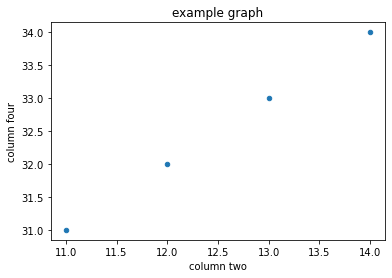

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline

display(my_df2)

my_df2.plot(x = 'col_two', y = 'col_four', kind = 'scatter')
plt.xlabel('column two')
plt.ylabel('column four')
plt.title('example graph')
plt.show()

**Challenge problem:** Can you change the code above to create a line plot instead of a scatter plot? Hint: The word **line** is key. For your convenience, the code from above is duplicated below so you can modify it:

,col_two,col_four,col_five
row_one,11,31,41
row_two,12,32,42
row_three,13,33,43
row_four,14,34,44


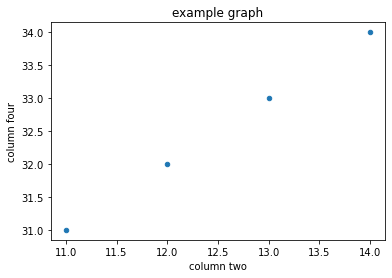

In [47]:
display(my_df2)

my_df2.plot(x = 'col_two', y = 'col_four', kind = 'scatter')
plt.xlabel('column two')
plt.ylabel('column four')
plt.title('example graph')
plt.show()

## Grouping data by a variable

Grouping data by one of the variables in the dataset is done using the `groupby()` method. This allows us to summarize data more specifically, by introducing hierarchy. See the below example where we count values within groups:

In [48]:
my_df2.iloc[1,0] = 11
my_df2.iloc[0,2] = np.nan
display(my_df2)

,col_two,col_four,col_five
row_one,11,31,NaN
row_two,11,32,42.0
row_three,13,33,43.0
row_four,14,34,44.0


Simply applying `count()` will return the number of values in each column.

In [49]:
display(my_df2.count())

col_two     4
col_four    4
col_five    3
dtype: int64

Grouping the data using `groupby()` first allows us to count within groups based on the values in `col_two`. Note how the `object.method()` notation can be chained to perform multiple tasks sequentially on the same data in one line (`object.method1().method2()` etc):

In [50]:
my_df_grouped = my_df2.groupby('col_two').count()
display(my_df_grouped)

,col_four,col_five
col_two,,
11,2,1
13,1,1
14,1,1


## Intro to statistical testing

The `scipy` package is a powerful tool to perform many statistical tests. Here we're just introducing a simple t-test, refer to the `scipy` documentation or Google for more advanced tests in the homework assignments.

In [51]:
from scipy.stats import ttest_ind

display(my_df2)

t, p = ttest_ind(my_df2.col_two, my_df2.col_four, equal_var = True)
print("t statistic for the t-test between col_two and col_four: " + str(t))
print("p-value for the t-test between col_two and col_four: " + str(p))

,col_two,col_four,col_five
row_one,11,31,NaN
row_two,11,32,42.0
row_three,13,33,43.0
row_four,14,34,44.0


t statistic for the t-test between col_two and col_four: -20.46429168191641
p-value for the t-test between col_two and col_four: 8.85326113215772e-07
